In [1]:
import AGNCatalogToolbox as ACT
import numpy as np
from matplotlib import pyplot as plt

from scipy import optimize

### Basic Function Comparison

### Stellar Mass

In [2]:
halo_low, halo_high = 11, 14
halo_mass = np.linspace(halo_low, halo_high, 500)
z = 0

stellar_mass_grylls = ACT.halo_mass_to_stellar_mass(halo_mass, z, formula="Grylls19", scatter=False)
stellar_mass_moster = ACT.halo_mass_to_stellar_mass(halo_mass, z, formula="Moster", scatter=False)

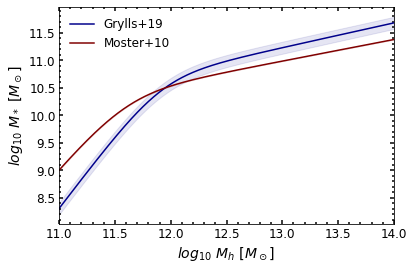

In [3]:
plt.figure()
color = "darkblue"
plt.plot(halo_mass, stellar_mass_grylls, label = "Grylls+19", color=color)
plt.fill_between(halo_mass, stellar_mass_grylls + 0.11, stellar_mass_grylls - 0.11, alpha=0.1, color=color)

color = "maroon"
plt.plot(halo_mass, stellar_mass_moster, label = "Moster+10", color=color)
plt.fill_between(halo_mass, stellar_mass_moster + 0.001, stellar_mass_moster - 0.001, alpha=0.1, color=color)

plt.xlim((halo_low, halo_high))
plt.tick_params(which='major', right=True, top=True, direction='in', length=4, width=1.5, labelsize = 12)
plt.tick_params(which='minor', right=True, top=True, direction='in', length=2, width=1.5)
plt.xlabel("$log_{10}$ $M_h$ [$M_\odot$]", fontsize = 14)
plt.ylabel("$log_{10}$ $M_*$ [$M_\odot$]", fontsize = 14)
plt.minorticks_on()
plt.legend(frameon=False, fontsize = 12)

plt.savefig("./Plots/SMHM_Comparison.png", dpi = 400)

plt.show()

### Black Hole Mass

In [4]:
stellar_mass = np.linspace(8, 11.5)

black_hole_mass_shankar = ACT.stellar_mass_to_black_hole_mass(stellar_mass, method="Shankar16", scatter=None)
scatter_shankar = (0.32 - 0.1*(stellar_mass - 12.))

black_hole_mass_KH = ACT.stellar_mass_to_black_hole_mass(stellar_mass, method="KormondyHo", scatter=None)

black_hole_mass_e4 = ACT.stellar_mass_to_black_hole_mass(stellar_mass, method="Eq4", scatter=None)


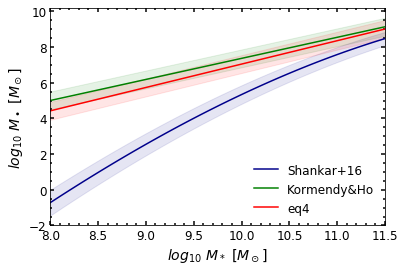

In [5]:
plt.figure()
color = "darkblue"
plt.plot(stellar_mass, black_hole_mass_shankar, label = "Shankar+16", color=color)
plt.fill_between(stellar_mass,  black_hole_mass_shankar + scatter_shankar,  black_hole_mass_shankar - scatter_shankar, alpha=0.1, color=color)

color = "green"
plt.plot(stellar_mass, black_hole_mass_KH, label = "Kormendy&Ho", color=color)
plt.fill_between(stellar_mass,  black_hole_mass_KH + 0.5,  black_hole_mass_KH - 0.5, alpha=0.1, color=color)

color = "red"
plt.plot(stellar_mass, black_hole_mass_e4, label = "eq4", color=color)
plt.fill_between(stellar_mass,  black_hole_mass_e4 + 0.5,  black_hole_mass_e4 - 0.5, alpha=0.1, color=color)



plt.xlim((8, 11.5))
plt.tick_params(which='major', right=True, top=True, direction='in', length=4, width=1.5, labelsize = 12)
plt.tick_params(which='minor', right=True, top=True, direction='in', length=2, width=1.5)
plt.xlabel("$log_{10}$ $M_*$ [$M_\odot$]", fontsize = 14)
plt.ylabel("$log_{10}$ $M_\\bullet$ [$M_\odot$]", fontsize = 14)
plt.minorticks_on()
plt.legend(frameon=False, fontsize = 12)

plt.savefig("./Plots/SMBHM_Comparison.png", dpi = 400)

plt.show()

## Duty Cycle

In [6]:
stellar_mass = np.linspace(9, 11.3, 100)
black_hole_mass = np.linspace(0, 10, 100)

DC_mann = ACT.to_duty_cycle("Man16", stellar_mass, black_hole_mass)
DC_mann

array([0.00151515, 0.00151515, 0.00151515, 0.00151515, 0.00151515,
       0.00151515, 0.00151515, 0.00151515, 0.00148973, 0.00137956,
       0.00126939, 0.00121212, 0.00121212, 0.00118118, 0.0010371 ,
       0.00092215, 0.00103917, 0.00115619, 0.00121212, 0.00121212,
       0.00121212, 0.00130237, 0.00141939, 0.00153783, 0.00166265,
       0.00178748, 0.00206725, 0.00239757, 0.00272727, 0.00272727,
       0.00272727, 0.00300751, 0.00331949, 0.00363147, 0.00406982,
       0.00451018, 0.00504117, 0.00587254, 0.0067039 , 0.00755069,
       0.0084309 , 0.00931111, 0.01046681, 0.01183756, 0.01320024,
       0.01450879, 0.01576308, 0.01696498, 0.01808802, 0.0189609 ,
       0.01983378, 0.02116395, 0.02260167, 0.02387388, 0.02507578,
       0.02651551, 0.02826699, 0.03001847, 0.03108625, 0.0321836 ,
       0.03386518, 0.03504049, 0.03597775, 0.03757942, 0.0391811 ,
       0.04079817, 0.0424176 , 0.04441468, 0.04690319, 0.04929892,
       0.0515966 , 0.05425717, 0.05745656, 0.05988306, 0.06275

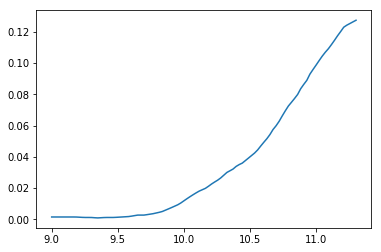

In [7]:
plt.figure()
plt.plot(stellar_mass, DC_mann)
plt.show()

# Test for SchF z evolution parameters

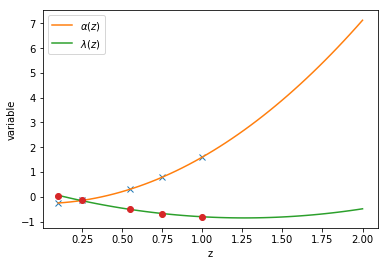

alpha 7.130665088133144
lambda -0.4870083857117173


In [8]:
def power_law(z, a, b, c):
    return ((a + z)**b) + c

def polynomial(z, a, b, c):
    return a * (z**2) + b * z + c

z = [0.1, 0.25, 0.55, 0.75, 1]
alpha = [-0.25, -0.15, 0.3, 0.8, 1.6]

lamda = [0.05, -0.15, -0.5, -0.7, -0.8]


args = np.polyfit(z, alpha, 2)

z_fine = np.linspace(np.amin(z), 2.0)

function = polynomial


popt, pcov  = optimize.curve_fit(function, z, alpha)

popt2, pcov2  = optimize.curve_fit(function, z, lamda)


plt.figure()
plt.plot(z, alpha, 'x')

plt.plot(z_fine, function(z_fine, *popt), label=r"$\alpha(z)$")
plt.plot(z_fine, function(z_fine, *popt2), label=r"$\lambda(z)$")
plt.plot(z, lamda, 'o')
plt.legend()
plt.xlabel('z')
plt.ylabel('variable')
plt.show()

target = 2
print("alpha", function(target, *popt))
print("lambda", function(target, *popt2))

## Sch Func Plot for Barcelona

In [9]:
from AGNCatalogToolbox import edd_schechter_function

z = 0.1
Edd_range = 10**np.linspace(-4, 0.5)
prob = edd_schechter_function(Edd_range, arg1=0.05, arg2=-0.25, z=z, data_path="./Data/")

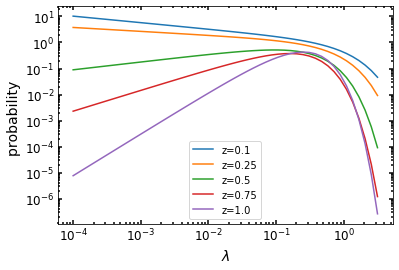

In [10]:
plt.figure()

z_range = [0.1, 0.25, 0.5, 0.75, 1.0]
lamda = [0.05, -0.15, -0.5, -0.7, -0.8]
alpha = [-0.25, -0.15, 0.3, 0.8, 1.6]

for i, z in enumerate(z_range):
    Edd_range = 10**np.linspace(-4, 0.5)
    prob = edd_schechter_function(Edd_range, arg1=lamda[i], arg2=alpha[i], z=z, data_path="./Data/")
    plt.plot(Edd_range, prob, label="z={}".format(z) )
    
plt.tick_params(which='major', right=True, top=True, direction='in', length=4, width=1.5, labelsize = 12)
plt.tick_params(which='minor', right=True, top=True, direction='in', length=2, width=1.5)
plt.xlabel("$\lambda$", fontsize = 14)
plt.ylabel("probability ", fontsize = 14)
plt.minorticks_on()
plt.legend()
plt.loglog()
plt.show()

## Schulze Plot for Paper

GetCorrectFile: Schulze_1.2.csv
Found Schulze file: ./Data/DutyCycles/Schulze_1.2.csv
[0.07943793 0.07943793 0.07943793 0.07943793 0.07943793 0.07943793
 0.07943793 0.07943793 0.07943793 0.07943793 0.19217053 0.18882596
 0.18352425 0.17570757 0.16609136 0.15443212 0.14269362 0.12795569
 0.11337219 0.10009287 0.08809384 0.19279104 0.19279104 0.19279104
 0.19279104 0.19279104 0.19279104 0.19279104 0.19279104 0.19279104
 0.19279104 0.19279104 0.19279104 0.19279104 0.19279104 0.19279104
 0.19279104 0.19279104 0.19279104 0.19279104 0.19279104 0.19279104
 0.19279104 0.19279104 0.19279104 0.19279104 0.19279104 0.19279104
 0.19279104 0.19279104]


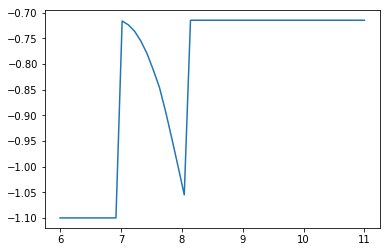

In [26]:
from AGNCatalogToolbox import to_duty_cycle

plt.figure()

M_bh_range = np.linspace(6, 11)
z=1.2
DC = to_duty_cycle("Schulze", stellar_mass=None, black_hole_mass=M_bh_range, z=z)

plt.plot(M_bh_range, np.log10(DC) )

plt.show()
